# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

**Import numpy and pandas**

In [1]:
import pandas as pd
import numpy as np

**Import visualization libraries and set %matplotlib inline.**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

**Read in the csv file as a dataframe called df**

In [3]:
df=pd.read_csv('911.csv')

**Check the info() of the df**

In [262]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [6]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [12]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [15]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [7]:
len(df['title'].unique())

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [10]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0]).sort_index()
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


**What is the most common Reason for a 911 call based off of this new column?**

In [142]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

<Axes: xlabel='Reason', ylabel='count'>

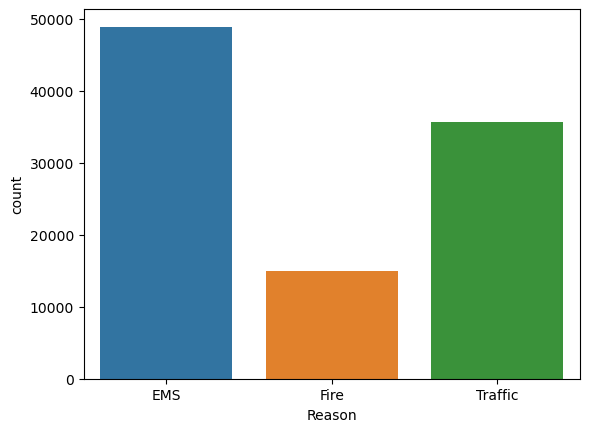

In [5]:
sns.countplot(x=df['Reason'])

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [303]:
df['timeStamp'].describe()

count                   99492
unique                  72577
top       2015-12-10 17:40:01
freq                        8
Name: timeStamp, dtype: object

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [6]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['timeStamp'].head(10)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
5   2015-12-10 17:40:01
6   2015-12-10 17:40:01
7   2015-12-10 17:40:01
8   2015-12-10 17:40:01
9   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [7]:
t=df['timeStamp'].dt.hour
t

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: timeStamp, Length: 99492, dtype: int32

In [8]:
df['Hour']=t

In [9]:
m=df['timeStamp'].dt.month
m

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: timeStamp, Length: 99492, dtype: int32

In [10]:
df['Month']=m

In [11]:
d=df['timeStamp'].dt.day_of_week
d

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: timeStamp, Length: 99492, dtype: int32

In [12]:
df['Day of Week']=d

In [13]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
df['Day of Week']=df['Day of Week'].map(dmap)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<Axes: xlabel='Day of Week', ylabel='count'>

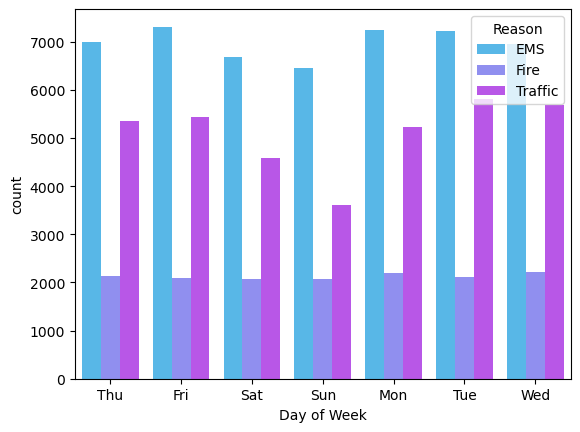

In [16]:
sns.countplot(x=df['Day of Week'],hue=df['Reason'],palette='cool')

**Now do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

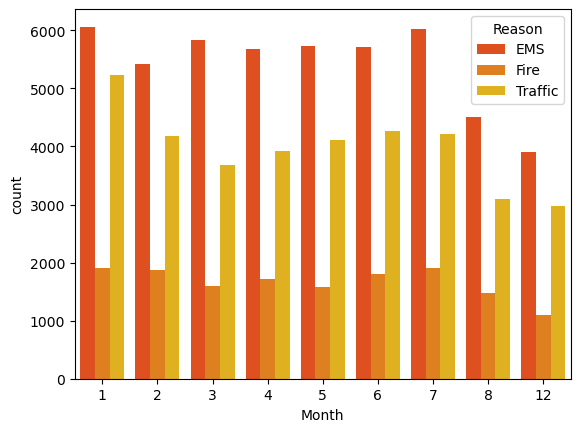

In [17]:
sns.countplot(x=df['Month'],hue=df['Reason'],palette='autumn')

**Did you notice something strange about the Plot?**

In [18]:
df.isna().sum()

lat                0
lng                0
desc               0
zip            12855
title              0
timeStamp          0
twp               43
addr             519
e                  0
Reason             0
Hour               0
Month              0
Day of Week        0
dtype: int64

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [19]:
byMonth=df.groupby('Month')
f=byMonth.count()
f.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<Axes: xlabel='Month'>

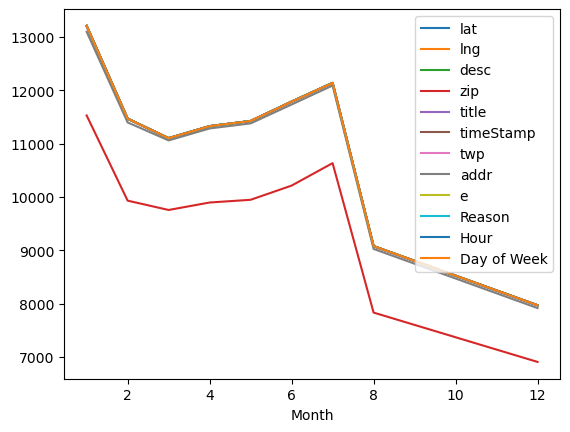

In [20]:
f.plot()


**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

In [21]:
f.reset_index(drop=True,inplace=True)

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


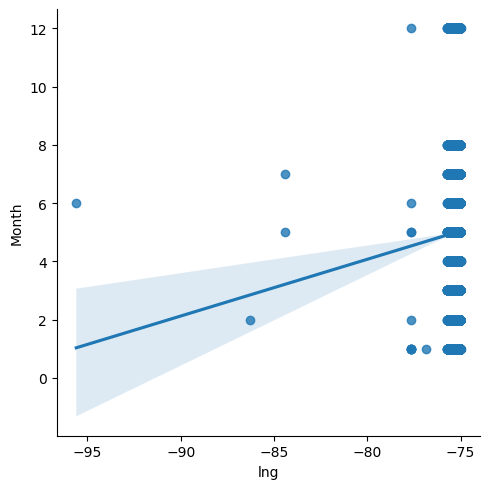

In [23]:
sns.lmplot(y='Month',x='lng',data=df)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [24]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99492 entries, 0 to 99491
Series name: timeStamp
Non-Null Count  Dtype         
--------------  -----         
99492 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 777.4 KB


In [25]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<Figure size 1000x500 with 0 Axes>

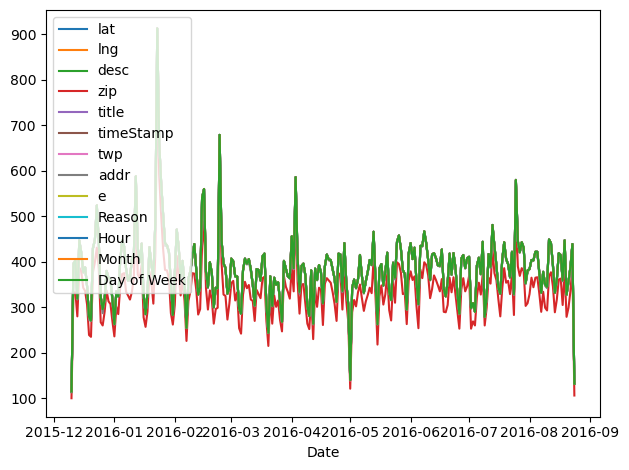

In [27]:
g=df.groupby('Date').count()
plt.figure(figsize=(10,5))
g.plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

<Axes: xlabel='Date'>

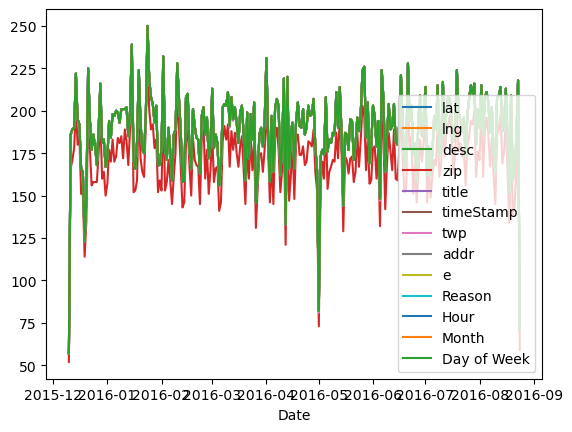

In [28]:
df[df['Reason']=='EMS'].groupby('Date').count().plot()


<Axes: xlabel='Date'>

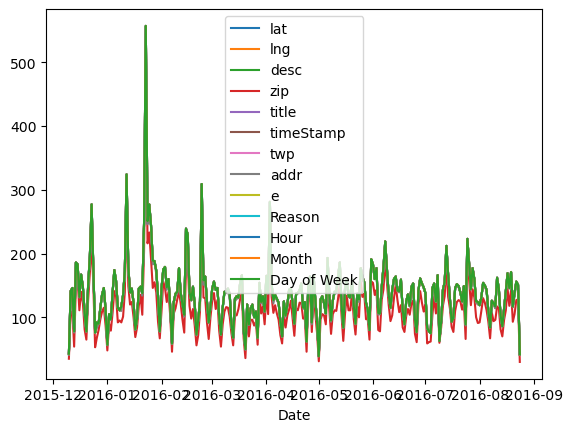

In [29]:
df[df['Reason']=='Traffic'].groupby('Date').count().plot()

<Axes: xlabel='Date'>

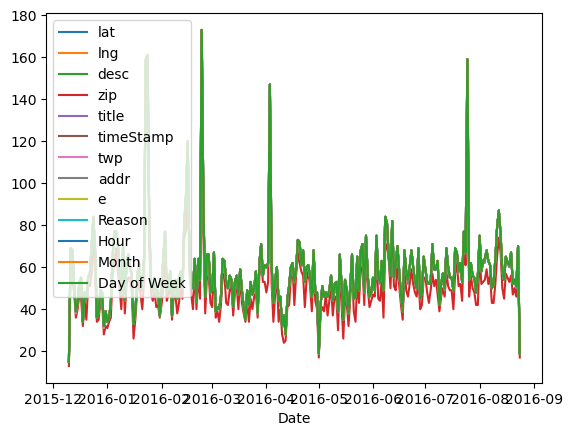

In [30]:
df[df['Reason']=='Fire'].groupby('Date').count().plot()

**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [31]:
s=df.pivot_table(values='lat',index='Day of Week',columns='Hour')
s

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,40.169621,40.157687,40.164340,40.160398,40.176780,40.174464,40.173802,40.156445,40.156771,40.161332,...,40.161011,40.151510,40.153237,40.156842,40.154495,40.155973,40.160767,40.162000,40.162012,40.166369
Mon,40.162162,40.161162,40.154063,40.174832,40.176374,40.175983,40.169440,40.160994,40.158522,40.160310,...,40.156284,40.156798,40.157361,40.155825,40.152469,40.153197,40.164290,40.157355,40.163505,40.159322
Sat,40.165790,40.165149,40.141154,40.148065,40.169937,40.177790,40.165542,40.162556,40.162658,40.170433,...,40.158426,40.160975,40.156457,40.153198,40.158696,40.160689,40.162264,40.164119,40.164187,40.165373
Sun,40.159093,40.155310,40.172051,40.159717,40.166284,40.159375,40.158364,40.158295,40.158953,40.165268,...,40.159051,40.166048,40.162271,40.167646,40.157766,40.157333,40.170696,40.162224,40.169060,40.164085
Thu,40.169482,40.163608,40.159372,40.171503,40.155952,40.161442,40.169035,40.157636,40.155030,40.148767,...,40.162824,40.152389,40.158809,40.164677,40.158404,40.162961,40.167278,40.163672,40.163334,40.155144
Tue,40.152128,40.153148,40.159789,40.165538,40.168159,40.161501,40.169410,40.164229,40.158545,40.154270,...,40.149995,40.154025,40.159972,40.157298,40.155406,40.160462,40.174660,40.168725,40.163557,40.162079
Wed,40.156905,40.165360,40.169074,40.169320,40.171085,40.162169,40.166772,40.157906,40.164154,40.158328,...,40.163060,40.159714,40.156123,40.153773,40.158612,40.151023,40.162469,40.168566,40.165110,40.163565


**Now create a HeatMap using this new DataFrame.**

In [32]:
s.corr()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Hour,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.428395,-0.302518,-0.168256,-0.101532,0.494172,0.337841,-0.530492,-0.436162,0.056131,...,0.613335,-0.350438,-0.503828,0.102730,0.030369,0.264247,-0.626609,-0.528833,-0.403009,-0.135175
1,0.428395,1.000000,-0.405447,0.014008,-0.107870,0.317530,0.064288,-0.209200,0.425459,0.078648,...,0.652164,0.053925,-0.442564,-0.395616,0.430538,-0.153317,-0.702131,-0.025556,-0.192010,-0.200541
2,-0.302518,-0.405447,1.000000,0.379736,-0.075882,-0.709511,-0.220904,-0.605479,-0.136941,-0.311314,...,0.259031,0.122646,0.252512,0.503732,0.048253,-0.397814,0.253552,0.194727,0.446819,0.062091
3,-0.168256,0.014008,0.379736,1.000000,-0.104338,-0.331530,0.305740,-0.202833,-0.340137,-0.762074,...,0.037297,-0.386801,0.100883,0.139160,-0.400230,-0.342399,0.158829,-0.138230,-0.189296,-0.715023
4,-0.101532,-0.107870,-0.075882,-0.104338,1.000000,0.646354,0.312322,0.082029,0.336300,0.522631,...,-0.200309,0.012264,-0.570297,-0.648927,-0.640371,-0.697868,-0.469221,-0.295132,-0.229477,0.631498
5,0.494172,0.317530,-0.709511,-0.331530,0.646354,1.000000,0.419712,0.170444,0.114442,0.546684,...,-0.027522,-0.162459,-0.674374,-0.625471,-0.437867,-0.139719,-0.681193,-0.546543,-0.515160,0.307398
6,0.337841,0.064288,-0.220904,0.305740,0.312322,0.419712,1.000000,-0.047772,-0.354737,-0.426440,...,-0.048172,-0.932462,-0.725510,-0.492471,-0.526774,-0.031885,-0.347803,-0.038034,-0.967134,-0.132326
7,-0.530492,-0.209200,-0.605479,-0.202833,0.082029,0.170444,-0.047772,1.000000,0.253170,0.152302,...,-0.859078,0.080980,0.293799,-0.371823,-0.161563,0.300526,0.457242,0.212658,-0.087291,0.009969
8,-0.436162,0.425459,-0.136941,-0.340137,0.336300,0.114442,-0.354737,0.253170,1.000000,0.545881,...,0.058985,0.595599,-0.148495,-0.597845,0.387591,-0.474895,-0.295571,0.411533,0.302327,0.519200


<Axes: xlabel='Hour', ylabel='Hour'>

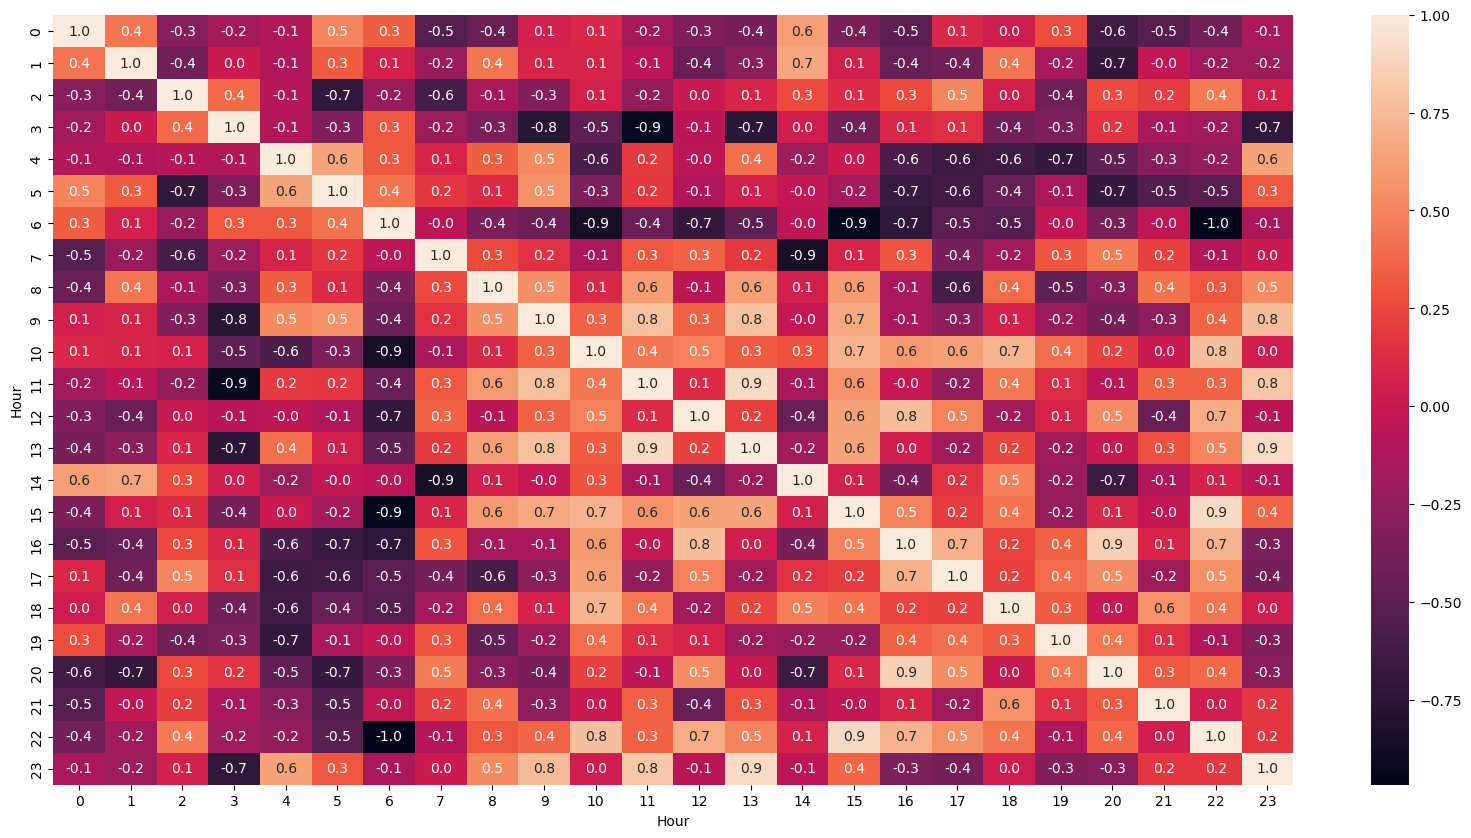

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(s.corr(),annot=True,fmt='.1f')

**Now create a clustermap using this DataFrame.**

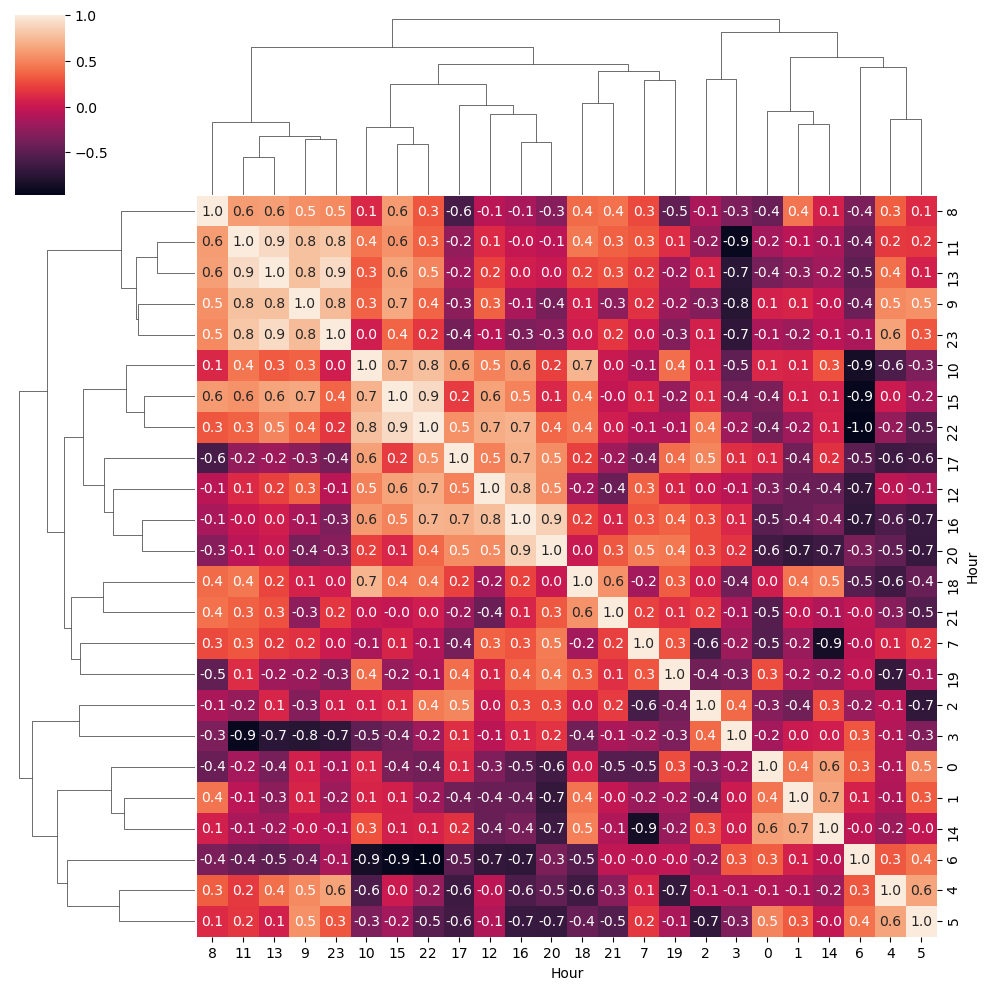

In [38]:
sns.clustermap(s.corr(),annot=True,fmt='.1f')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [392]:
p=df.pivot_table(values='lat',index='Day of Week',columns='Month')
p

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,40.161439,40.158428,40.160825,40.158540,40.157945,40.154017,40.159495,40.154827,40.160551
Mon,40.160669,40.159540,40.163434,40.154817,40.158249,40.157606,40.152441,40.155661,40.160774
Sat,40.163477,40.159981,40.157859,40.161857,40.162026,40.157370,40.162403,40.160300,40.164712
Sun,40.166395,40.162071,40.161356,40.160816,40.161984,40.164407,40.160533,40.163153,40.161993
Thu,40.159112,40.157711,40.161705,40.157059,40.156176,40.154147,40.159432,40.156947,40.163191
Tue,40.166180,40.163650,40.156035,40.158453,40.158187,40.155161,40.160803,40.152565,40.158325
Wed,40.167103,40.163041,40.160972,40.160394,40.159481,40.152505,40.155806,40.159055,40.159064


In [394]:
p.corr()

Month,1,2,3,4,5,6,7,8,12
Month,,,,,,,,,
1,1.000000,0.944502,-0.462117,0.655000,0.600769,0.228881,0.204770,0.320011,-0.453781
2,0.944502,1.000000,-0.484064,0.409725,0.411855,0.151266,0.053746,0.094059,-0.606098
3,-0.462117,-0.484064,1.000000,-0.490756,-0.223637,0.136107,-0.702523,0.245611,0.124437
4,0.655000,0.409725,-0.490756,1.000000,0.774568,0.227455,0.667921,0.636364,0.255128
5,0.600769,0.411855,-0.223637,0.774568,1.000000,0.655107,0.343784,0.764306,0.328552
6,0.228881,0.151266,0.136107,0.227455,0.655107,1.000000,0.195093,0.626615,0.340269
7,0.204770,0.053746,-0.702523,0.667921,0.343784,0.195093,1.000000,0.201199,0.394243
8,0.320011,0.094059,0.245611,0.636364,0.764306,0.626615,0.201199,1.000000,0.548926
12,-0.453781,-0.606098,0.124437,0.255128,0.328552,0.340269,0.394243,0.548926,1.000000


<Axes: xlabel='Month', ylabel='Month'>

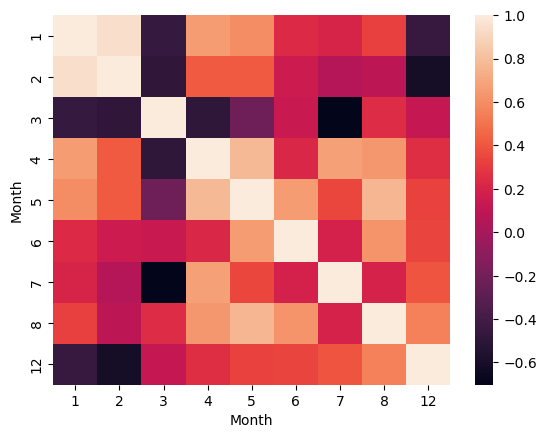

In [395]:
sns.heatmap(p.corr())

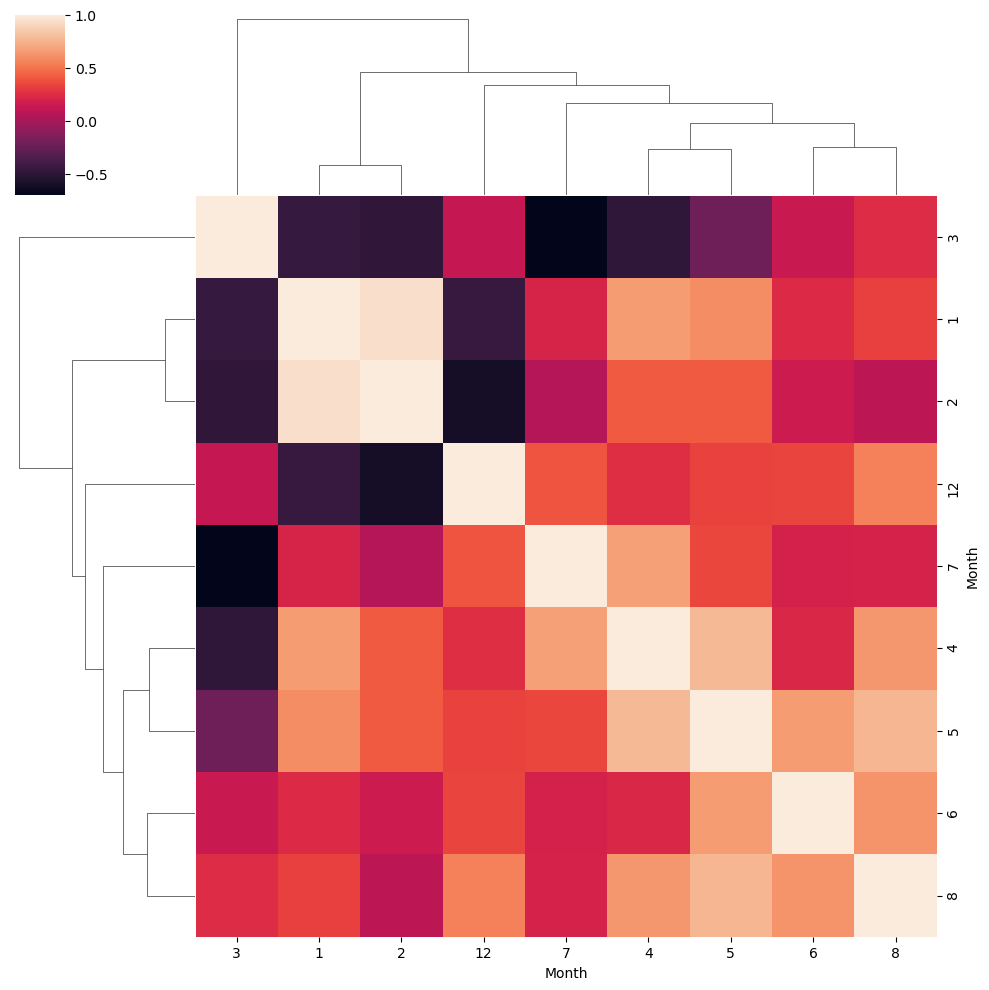

In [396]:
sns.clustermap(p.corr())


# Great Job!